# Explore here

In [68]:
from utils import db_connect
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Establecer la conexión a la base de datos
engine = db_connect()

# Verificar si la conexión es exitosa
#if engine:
    #print("Conexión exitosa")

# Consultar la tabla en la base de datos y crear un DataFrame
data = pd.read_sql_table('2019-ABNB', engine)

pd.set_option('display.max_columns', None)  # muestra todas las columnas del dataframe
print(data.head())



     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [69]:
# Mostrar informacion sobre el dataframe
print(data.shape)
print(data.info())

(48895, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review         

In [70]:
print(data.nunique())

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64


In [71]:
data.drop(['id', 'name', 'host_id', 'host_name', 'last_review', 'reviews_per_month'], axis=1, inplace=True)
print(data.head())

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews  calculated_host_listings_count  \
0    149               1                  9                               6   
1    225               1                 45                               2   
2    150               3                  0                               1   
3     89               1                270                               1   
4     80              10                  9                               1   

   availability_365  
0               365  
1               35

In [72]:
print(data.duplicated().sum())
print(data.isnull().any().any())
print(data.describe().T)

0
False
                                  count        mean         std       min  \
latitude                        48895.0   40.728949    0.054530  40.49979   
longitude                       48895.0  -73.952170    0.046157 -74.24442   
price                           48895.0  152.720687  240.154170   0.00000   
minimum_nights                  48895.0    7.029962   20.510550   1.00000   
number_of_reviews               48895.0   23.274466   44.550582   0.00000   
calculated_host_listings_count  48895.0    7.143982   32.952519   1.00000   
availability_365                48895.0  112.781327  131.622289   0.00000   

                                     25%        50%         75%          max  
latitude                        40.69010   40.72307   40.763115     40.91306  
longitude                      -73.98307  -73.95568  -73.936275    -73.71299  
price                           69.00000  106.00000  175.000000  10000.00000  
minimum_nights                   1.00000    3.00000    5.00

In [73]:
print(data[data['price'] == 0])
print((data['price'] == 0).sum())
data.drop(data[data['price'] == 0].index, axis=0, inplace=True)

      neighbourhood_group       neighbourhood  latitude  longitude  \
23161            Brooklyn  Bedford-Stuyvesant  40.69023  -73.95428   
25435               Bronx     East Morrisania  40.83296  -73.88668   
25635            Brooklyn            Bushwick  40.69467  -73.92433   
25754            Brooklyn          Greenpoint  40.72462  -73.94072   
25779            Brooklyn        Williamsburg  40.70838  -73.94645   
25795            Brooklyn  Bedford-Stuyvesant  40.68173  -73.91342   
25796            Brooklyn  Bedford-Stuyvesant  40.68279  -73.91170   
25797            Brooklyn  Bedford-Stuyvesant  40.68258  -73.91284   
26259           Manhattan         Murray Hill  40.75091  -73.97597   
26842            Brooklyn            Bushwick  40.69211  -73.90670   
26868            Brooklyn            Bushwick  40.69166  -73.90928   

             room_type  price  minimum_nights  number_of_reviews  \
23161     Private room      0               4                  1   
25435     Private room 

In [74]:
print((data[data['price'] > 1000]))
print(((data['price'] > 1000).sum()) / len(data['price']) * 100)
data.drop(data[data['price'] > 1000].index, axis=0, inplace=True)

      neighbourhood_group       neighbourhood  latitude  longitude  \
496             Manhattan     Upper West Side  40.77350  -73.98697   
762             Manhattan        West Village  40.73301  -74.00268   
946             Manhattan     Upper West Side  40.80142  -73.96931   
1105            Manhattan     Lower East Side  40.72152  -73.99279   
1480            Manhattan     Upper West Side  40.77516  -73.98573   
...                   ...                 ...       ...        ...   
48080           Manhattan                SoHo  40.72060  -74.00023   
48304           Manhattan      Hell's Kitchen  40.75533  -73.99866   
48305           Manhattan     Upper East Side  40.78132  -73.95262   
48523            Brooklyn  Bedford-Stuyvesant  40.68767  -73.95805   
48535            Brooklyn  Bedford-Stuyvesant  40.68245  -73.93417   

             room_type  price  minimum_nights  number_of_reviews  \
496    Entire home/apt   2000              30                 30   
762    Entire home/apt 

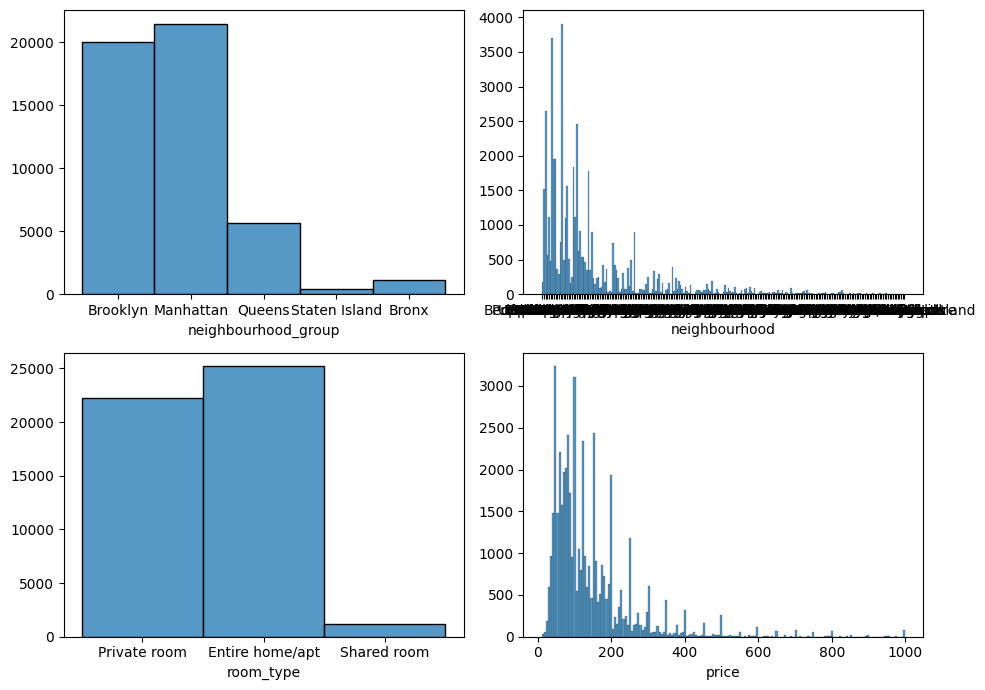

In [75]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# histograma múltiple
sns.histplot(ax = axis[0, 0], data = data, x = "neighbourhood_group").set(ylabel=None)
sns.histplot(ax = axis[0, 1], data = data, x = "neighbourhood").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = data, x = "room_type").set(ylabel = None)
sns.histplot(ax = axis[1, 1], data = data, x = "price").set(ylabel = None)

# Rotar nombres del eje x en el subplot neighbourhood

#axis[0, 1].set_xticklabels(axis[0, 1].get_xticklabels(), rotation=45)

# Ajustar el layout
plt.tight_layout()

plt.show()

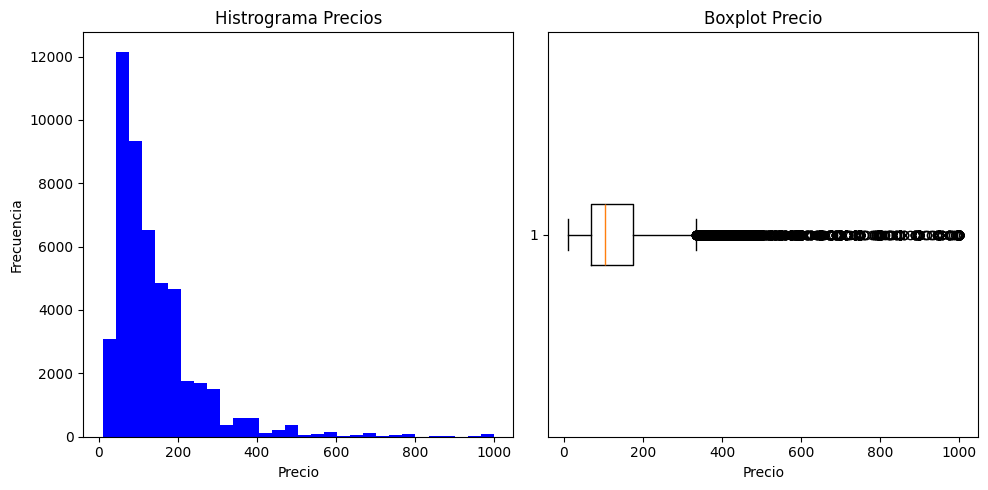

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].hist(data['price'], bins=30, color='blue')
ax[0].set_title("Histrograma Precios")
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Frecuencia')

ax[1].boxplot(data['price'], vert=False)
ax[1].set_title("Boxplot Precio")
ax[1].set_xlabel("Precio")

plt.tight_layout()
plt.show()

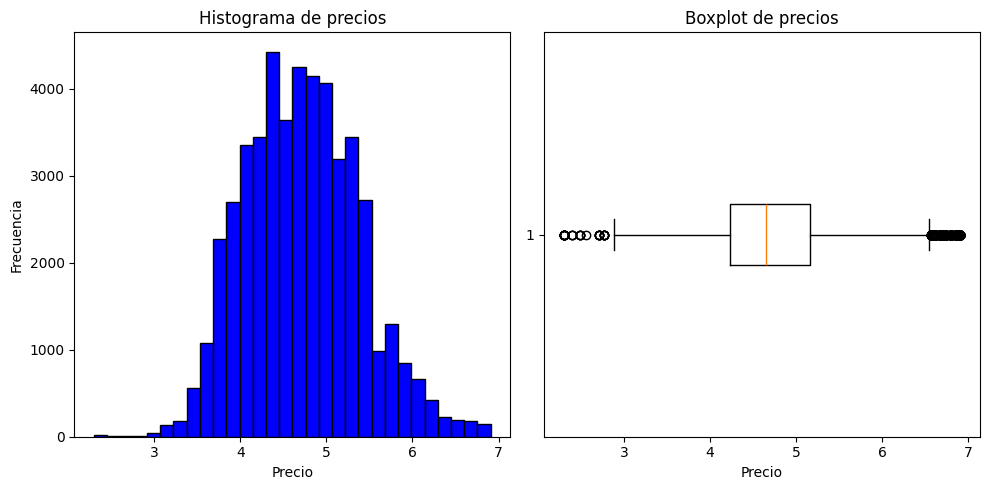

In [77]:
data['price_log'] = np.log(data.price)

# figura -subplots (histograma y boxplot)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(data['price_log'], bins=30, color='blue', edgecolor='black')
ax[0].set_title('Histograma de precios')
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(data['price_log'], vert=False)
ax[1].set_title('Boxplot de precios')
ax[1].set_xlabel('Precio')

# Mostrar la figura
plt.tight_layout()
plt.show()